<a href="https://colab.research.google.com/github/MuhammadAhmadNaveed4714/AiComplianceAgent/blob/main/BSEF23A020_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()


Saving real_estate_price_size.csv to real_estate_price_size.csv


In [3]:
df = pd.read_csv("real_estate_price_size.csv")
df.head()


,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
price    0
size     0
dtype: int64


In [5]:
feature = df["size"].to_numpy()
target = df["price"].to_numpy()


In [6]:
mean_size = np.mean(feature)
std_size = np.std(feature)

feature_scaled = (feature - mean_size) / std_size


In [7]:
np.random.seed(42)

indices = np.random.permutation(len(feature_scaled))

train_size = int(0.8 * len(indices))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = feature_scaled[train_idx]
y_train = target[train_idx]

X_test = feature_scaled[test_idx]
y_test = target[test_idx]


In [8]:
def predict(x, weight, bias):
    return weight * x + bias


In [9]:
def mse_loss(x, y, weight, bias):
    predictions = predict(x, weight, bias)
    error = predictions - y
    return np.mean(error ** 2)


In [10]:
def train_model(x, y, lr=0.01, epochs=1000):

    weight = 0
    bias = 0

    n = len(y)
    cost_history = []

    for epoch in range(epochs):

        predictions = predict(x, weight, bias)

        dw = (2/n) * np.sum((predictions - y) * x)
        db = (2/n) * np.sum(predictions - y)

        weight = weight - lr * dw
        bias = bias - lr * db

        cost = mse_loss(x, y, weight, bias)
        cost_history.append(cost)

    return weight, bias, cost_history


In [11]:
W, B, losses = train_model(X_train, y_train, lr=0.01, epochs=1000)

print("Optimal Weight:", W)
print("Optimal Bias:", B)
print("Final Training Loss:", losses[-1])


Optimal Weight: 65600.74418429882
Optimal Bias: 294600.6055703783
Final Training Loss: 1325494948.09169


In [12]:
test_predictions = predict(X_test, W, B)


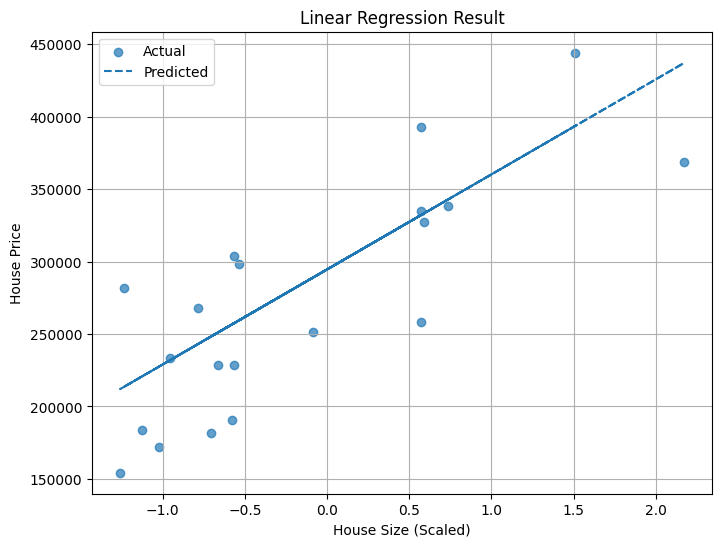

In [13]:
plt.figure(figsize=(8,6))

plt.scatter(X_test, y_test, alpha=0.7, label="Actual")
plt.plot(X_test, test_predictions, linestyle="--", label="Predicted")

plt.xlabel("House Size (Scaled)")
plt.ylabel("House Price")
plt.title("Linear Regression Result")
plt.legend()
plt.grid(True)

plt.show()
